<a href="https://colab.research.google.com/github/rnayebi21/PolygenceMLResearch-scRNAseq/blob/main/Creating_T_cells_GNB%2C_Standard_Scaling_%2B_PCA_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection, linear_model
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

sns.set()


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [13]:
T_gene_expression_ID = "18yyfxNJhE5R1JDO3Cw4hyqM61luBs8RG"
T_GE_file = drive.CreateFile({'id':T_gene_expression_ID})
T_GE_file.GetContentFile('tpm_all_scp.txt')
T_GE = pd.read_csv("tpm_all_scp.txt", sep = "\t")

labels_df_ID = "1hjhQkze5In5WGcMZl-S-kEroSS0zRHgp"
labels_df_file = drive.CreateFile({'id':labels_df_ID})
labels_df_file.GetContentFile('labels_raw')
labels_df = pd.read_csv("labels_raw")

labels_df = labels_df.set_index("Unnamed: 0")
labels_df.index.name = ""

T_GE.index = T_GE.GENE
T_GE = T_GE.drop("GENE", axis = 1)
T_GE = T_GE.transpose()

In [ ]:
def confusion_matrix_T (lbl, pred):
  cm = metrics.confusion_matrix(lbl, pred)
  plt.figure(figsize=(11,11))
  plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
  plt.title('Confusion Matrix', size = 15)
  plt.colorbar()
  tick_marks = np.arange(11)
  plt.xticks(tick_marks, ["G01", "G02", "G03", "G04", "G05", "G06", "G07", "G08", "G09", "G10", "G11"], rotation = 45, size = 10)
  plt.yticks(tick_marks, ["G01", "G02", "G03", "G04", "G05", "G06", "G07", "G08", "G09", "G10", "G11"], size = 10)
  plt.tight_layout()
  plt.ylabel('Actual', size = 15)
  plt.xlabel('Predicted', size = 15)
  width, height = cm.shape

  for x in range(width):
    for y in range(height):
      plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

In [14]:
scaler = StandardScaler()
scaler.fit(T_GE, labels_df)
T_GE_scaled = scaler.transform(T_GE)

In [15]:
x_train,x_test,train_lbls,test_lbls=train_test_split(T_GE_scaled,labels_df,test_size=0.3,random_state=0)

In [16]:
num_components = np.array([])
for i in range(1, 11):
  delta = (i/2)/10
  pca = PCA(1 - delta)
  pca.fit(x_train)
  num_components = np.append(pca.n_components_, num_components)
  print(*[i, ":", pca.n_components_])

1 : 6740
2 : 5530
3 : 4700
4 : 4052
5 : 3515
6 : 3054
7 : 2648
8 : 2287
9 : 1960
10 : 1663


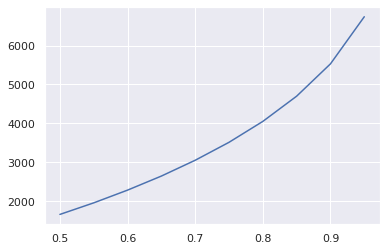

In [17]:
index_of_PCA =  [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
plt.plot(index_of_PCA, num_components)

In [18]:
pca = PCA(0.8)
pca.fit(T_GE_scaled)
T_GE_scaled_PCA = pca.transform(T_GE_scaled)

In [19]:
pd.DataFrame(T_GE_scaled_PCA).to_csv("T_GE_scaled_PCA.csv")

In [20]:
T_GE_scaled_PCA

array([[ 3.45455884e+01, -1.06619924e+01,  1.69338168e+01, ...,
        -1.44146393e+00,  3.47561361e-01, -6.76022518e-01],
       [-6.61668839e+00, -8.61371600e+00,  1.35335858e+01, ...,
         1.54228359e+00, -1.61575819e-01, -4.88236594e-02],
       [-1.32584672e+01, -1.11308439e+01,  1.61900717e+01, ...,
         1.14021170e+00, -9.16494157e-01, -1.09954136e-02],
       ...,
       [ 1.19921675e+01,  1.26391856e+01,  6.81424317e+00, ...,
         5.29449551e-01, -1.34217436e+00, -9.81368213e-02],
       [ 2.07399062e+01,  1.69874274e+01,  6.10899450e+00, ...,
        -6.21669742e-01, -3.69321814e-01, -6.39867965e-01],
       [ 2.04602877e+01,  1.69101110e+01,  6.14714166e+00, ...,
        -5.28114812e-01, -5.26091806e-01, -6.87551768e-01]])

In [ ]:
T_GE_scaled_PCA_ID = "1M32Mwogm5MAcT5GpGwTTdX4lpQH2GE_W"
T_GE_scaled_PCA_file = drive.CreateFile({'id':T_GE_scaled_PCA_ID})
T_GE_scaled_PCA_file.GetContentFile('T_GE_scaled_PCA.csv')
T_GE_scaled_PCA = pd.read_csv("T_GE_scaled_PCA.csv")

T_GE_scaled_PCA = T_GE_scaled_PCA.drop("Unnamed: 0", axis = 1)

In [ ]:
GNB_grid_search_scaled.fit(train_PCA_scaled, train_lbl_PCA_scaled)
GNB_grid_search_scaled.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

{'var_smoothing': 1e-64}

In [ ]:
best_GNB_model_scaled = GNB_grid_search_scaled.best_estimator_
best_GNB_model_pred_scaled = best_GNB_model_scaled.predict(test_PCA)
best_GNB_model_scaled.score(test_PCA_scaled, test_lbl_PCA_scaled)

0.5257774140752864

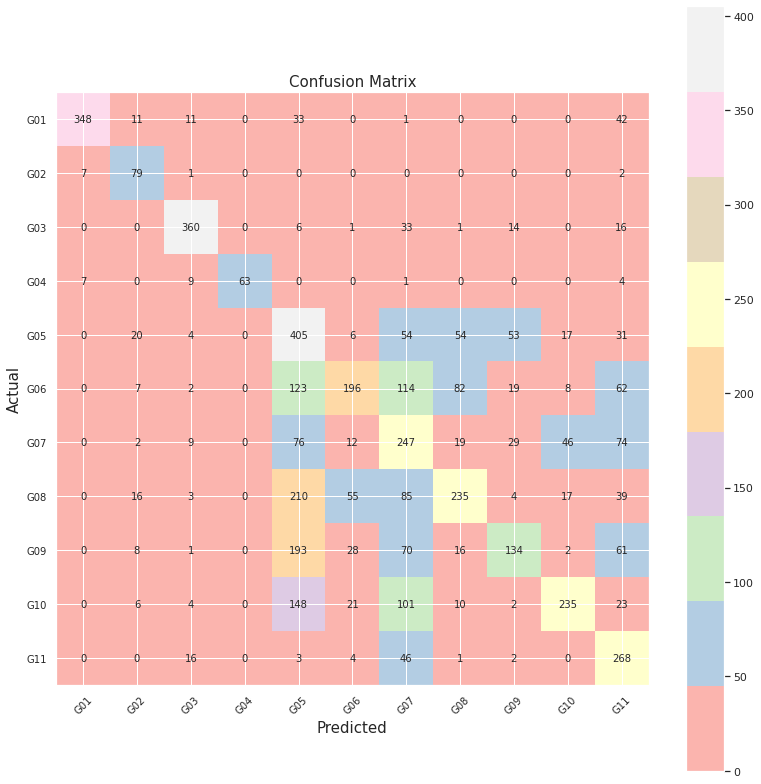

In [ ]:
confusion_matrix_T(test_lbl_PCA_scaled, best_GNB_model_pred_scaled)